In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.api as sm

In [2]:
seed = 420

# Task 1

1.Recently opened movie theater is trying to figure out with below data that what is the genre of 10 movies which has the highest audience score. Show 10 highest audience score movies and the number of each movie genre among those films. Save the result to a new CSV file.<br>
https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv

In [2]:
movie_df = pd.read_csv( "https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv" )

In [4]:
sorted_movie = movie_df.sort_values( "Audience score %", ascending=False ).head(10)
sorted_movie

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
6,WALL-E,Animation,Disney,89,2.896019,96,$521.28,2008
22,Tangled,Animation,Disney,88,1.365692,89,$355.01,2010
39,My Week with Marilyn,Drama,The Weinstein Company,84,0.825800,83,$8.26,2011
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
43,Midnight in Paris,Romence,Sony,84,8.744706,93,$148.66,2011
54,Knocked Up,Comedy,Universal,83,6.636402,91,$219,2007
12,Twilight,Romance,Summit,82,10.180027,49,$376.66,2008
31,P.S. I Love You,Romance,Independent,82,5.103117,21,$153.09,2007
76,(500) Days of Summer,comedy,Fox,81,8.096000,87,$60.72,2009


In [5]:
grouped_movie = sorted_movie[ [ "Genre", "Film" ] ].groupby( "Genre" )
top_genres = grouped_movie.count()
top_genres

,Film
Genre,
Animation,2
Comedy,1
Drama,2
Romance,2
Romence,1
comedy,1
romance,1


In [6]:
sorted_movie.to_csv( "top_10_movies.csv", index=False )
top_genres.to_csv( "top_10_movies_genres.csv" )

# Task 2

Credit risk database is a typical banking database containing information about loan applications. Usually it contains information on all parameters which are completed by the risk department in order to evaluate the applicants’ status and make the decision on the loan provision.<br><br>

`Loan ID` - ID of the application in the database. Applied automatically by the system.<br>
`Gender` - select from the list Male or Female<br>
`Married` - marital status of the loan applicant, select from the list Yes or No<br>
`Dependents` - number of dependents of the loan applicant, select from the list 0, 1, 2 or 3+<br>
`Education` - educational level of the applicant, select from the list Graduate or Not Graduate<br>
`Self_Employed` - indicates whether the loan applicant has his private entrepreneurship, select from the list Yes or No<br>
`ApplicantIncome` - monthly average income in USD of the Loan applicant<br>
`CoapplicantIncome` -monthly average income in USD of the Loan applicant’s spouse<br>
`LoanAmount` - amount of the loan considered in thousands USD<br>
`Loan_Amount_Term` - loan length in months<br>
`Credit_History` - availability of previous credit history of the applicant, select from the list Yes or No<br>
`Property_Area` - property location classification according to the dictionary: Urban, Semiurban, Rural<br>
`Loan_Status` - the final decision made on the loan provision to the applicant, select from the list Y or N<br>
<br>
Create a credit risk analysis model using given data to provide a bank with robust system.<br>
Create couple of models and choose best performed model. 



In [7]:
raw_df = pd.read_csv( "Credit_Risk.csv" )
raw_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
# Remove Loan_ID column which is identifier and has no correlation with our data
raw_df.drop( columns=["Loan_ID"], inplace = True )

In [9]:
raw_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [11]:
raw_df["Credit_History"] = raw_df["Credit_History"].apply( lambda x: x if pd.isna(x) else str(x) )

In [12]:
# categorize columns 
target = "Loan_Status"
categorical = [ col for col in raw_df.drop(columns=[target]).columns if (raw_df[col].dtype == np.object)  ]
numerical = [  col for col in raw_df.drop(columns=[target]).columns if ( (raw_df[col].dtype == np.int64) or (raw_df[col].dtype == np.float64 ) )    ]

## EDA

In [13]:
raw_df.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,2,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,1.0,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,475,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,NaN,NaN,NaN


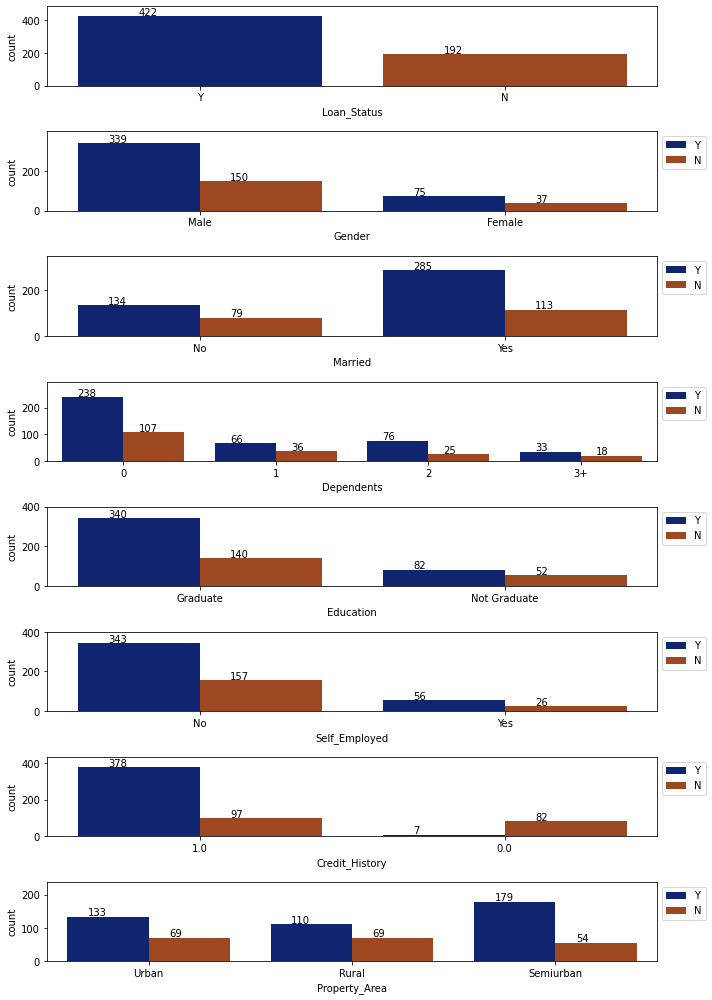

In [14]:
# Exploring categorical columns

fig, ax = plt.subplots( nrows = len(categorical)+1 , ncols=1, figsize = (10,14) )

sns.countplot(x=target, data=raw_df, palette="dark", ax=ax[0] )
bars = ax[0].patches
max_h = 0
for bar in bars:
    h = bar.get_height()
    w = bar.get_width()
    x = bar.get_x()
    if h>max_h:
        max_h=h
    ax[0].text( x + (w/4) , h+5, f"{h}" )
        
ax[0].set_ylim(0, max_h+60 )

for i,cat in enumerate(categorical, start=1):
    sns.countplot(x=cat, data=raw_df, hue = target, palette="dark", ax=ax[i] )
    ax[i].legend(bbox_to_anchor=(1, 1), loc=2)
    
    bars = ax[i].patches
    max_h = 0
    for bar in bars:
        h = bar.get_height()
        w = bar.get_width()
        x = bar.get_x()
        if h>max_h:
            max_h=h
        ax[i].text( x + (w/4) , h+5, f"{h}" )
        
    ax[i].set_ylim(0, max_h+60 )
    
plt.tight_layout()
plt.show()

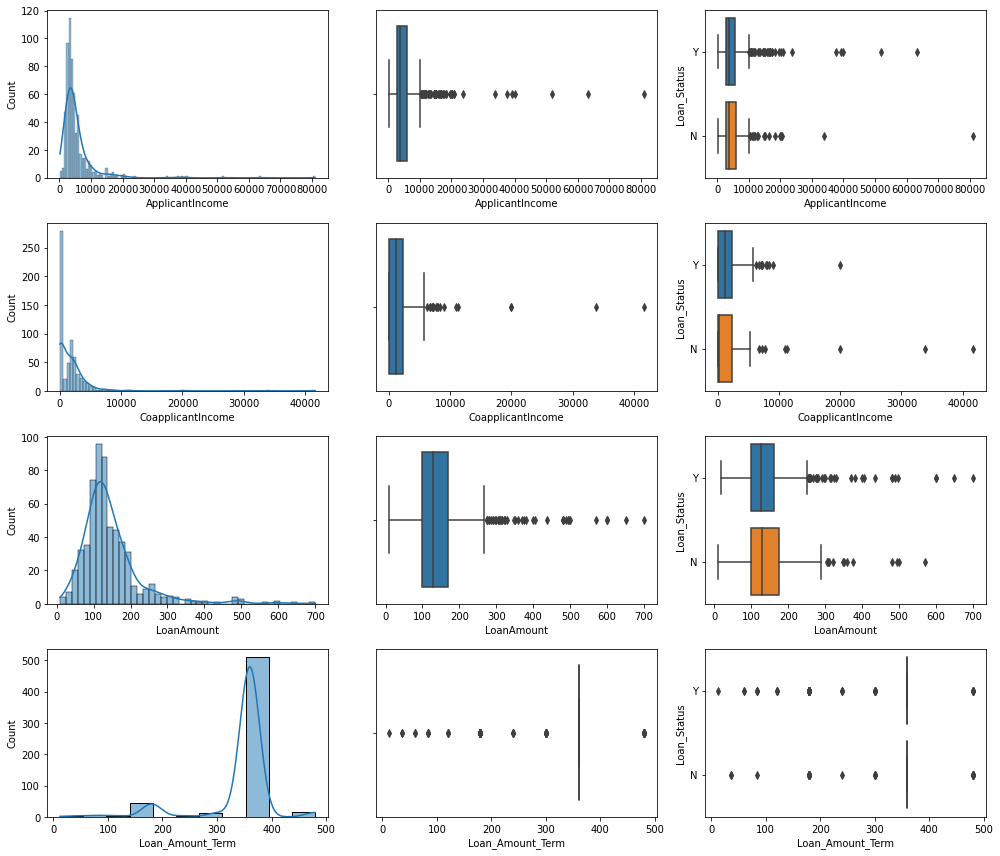

In [15]:
# exploring numerical features

fig, ax = plt.subplots( nrows = len(numerical) , ncols=3, figsize = (14,12) )

for i,cat in enumerate(numerical):
    sns.histplot( x=cat ,data=raw_df,kde=True, ax = ax[i,0],  )
    sns.boxplot( x=cat ,data=raw_df, ax = ax[i,1] )
    sns.boxplot( x=cat , y = target, data=raw_df, ax = ax[i,2] )

plt.tight_layout()
plt.show()

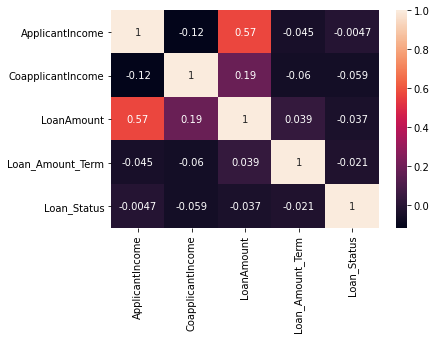

In [16]:
# see multicolinearity of numerical features and correlation with target
corr = pd.concat( [raw_df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]], pd.DataFrame(np.where(raw_df["Loan_Status"]=="Y", 1,0), columns=["Loan_Status"]) ] ,axis=1 )     
sns.heatmap( corr.corr() , annot=True )
plt.show()

## FE & Preprocessing

In [17]:
raw_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# fill nan values for continuous feature
raw_df["LoanAmount"] = raw_df["LoanAmount"].fillna( raw_df["LoanAmount"].median() ) # I would like to use median because of its skew

# fill nan values for discrete features
raw_df["Gender"] = raw_df["Gender"].fillna( raw_df["Gender"].mode()[0] )
raw_df["Married"] = raw_df["Married"].fillna( raw_df["Married"].mode()[0] )
raw_df["Dependents"] = raw_df["Dependents"].fillna( raw_df["Dependents"].mode()[0] )
raw_df["Self_Employed"] = raw_df["Self_Employed"].fillna( raw_df["Self_Employed"].mode()[0] )
raw_df["Loan_Amount_Term"] = raw_df["Loan_Amount_Term"].fillna( raw_df["Loan_Amount_Term"].mode()[0] )
raw_df["Credit_History"] = raw_df["Credit_History"].fillna( raw_df["Credit_History"].mode()[0] )



In [19]:
# removing extreme outliers
raw_df = raw_df[ raw_df["ApplicantIncome"] < 20000 ]    
raw_df = raw_df[ raw_df["CoapplicantIncome"] < 10000 ]  
raw_df = raw_df[  raw_df["LoanAmount"] < 350 ]          

In [20]:
# for scaling purpose i would like to convert month to year
raw_df["Loan_Amount_Term"] = raw_df["Loan_Amount_Term"]/12

In [21]:
# transform features into readable form for ML
raw_df["Gender"] = np.where( raw_df["Gender"]=="Male", 1,0 )
raw_df["Married"] = np.where( raw_df["Married"]=="Yes", 1,0 )
raw_df["Dependents"] = raw_df["Dependents"].apply( lambda x : int(x[0]) )
raw_df["Education"] = np.where( raw_df["Education"]=="Graduate", 1,0 )
raw_df["Self_Employed"] = np.where( raw_df["Self_Employed"]=="Yes", 1,0 )
raw_df["Credit_History"] = raw_df["Credit_History"].apply( lambda x: float(x) )
raw_df = pd.get_dummies( raw_df, columns=["Property_Area"] )
raw_df[ target ] = np.where( raw_df[target] == "Y",1,0 )

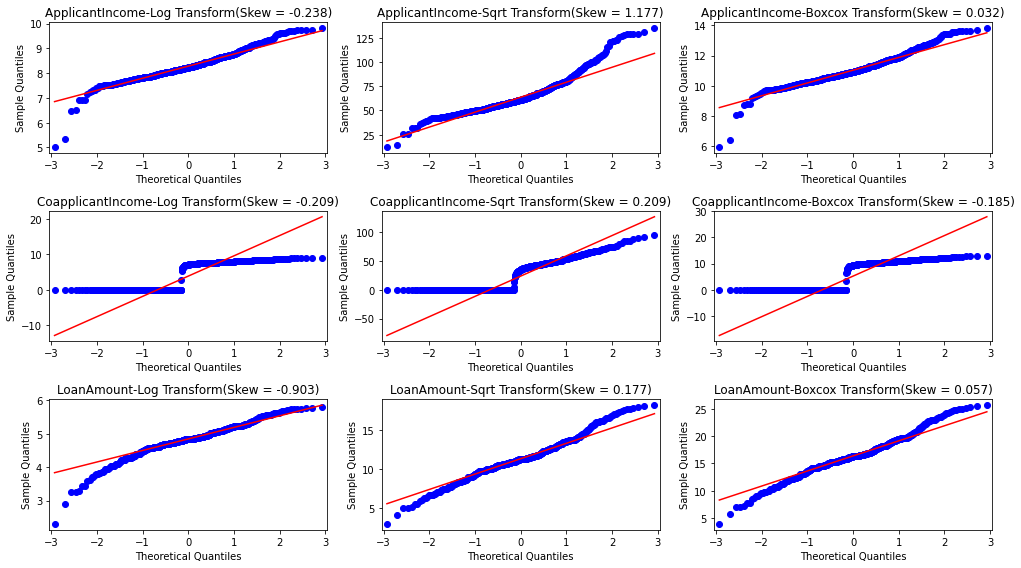

In [22]:
# q-q plots( check skew )
names = ["ApplicantIncome","CoapplicantIncome","LoanAmount"  ]
fig, ax = plt.subplots( nrows = len(names) , ncols = 3 , figsize = (14,8) )


for i,name in enumerate(names):
    # log transform 
    log = np.log(raw_df[ name ]+1) # avoid 0 
    sm.qqplot(log, line ='q',ax = ax[i,0])
    ax[i,0].set_title( f"{name}-Log Transform(Skew = {  round(log.skew(), 3) })" )

    # sqrt transform
    sqrt = np.sqrt(raw_df[name])
    sm.qqplot(  sqrt , line ='q',ax = ax[i,1])
    ax[i,1].set_title( f"{name}-Sqrt Transform(Skew = {  round(sqrt.skew(), 3) })" )

    #boxcox
    fitted_data, fitted_lambda = sts.boxcox( raw_df[name]+1 ) # avoid 0
    sm.qqplot( fitted_data, line ='q',ax=ax[i,2] )
    ax[i,2].set_title( f"{name}-Boxcox Transform(Skew = {  round(pd.Series(fitted_data).skew(), 3) })" )

plt.tight_layout()
plt.show()

In [23]:
# handle skew features( boxcox gives best result   )
raw_df["ApplicantIncome"] = sts.boxcox( raw_df["ApplicantIncome"]+1 )[0]
raw_df["CoapplicantIncome"] = sts.boxcox( raw_df["CoapplicantIncome"]+1 )[0]
raw_df["LoanAmount"] = sts.boxcox( raw_df["LoanAmount"]+1 )[0]

In [24]:
raw_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,11.712314,0.000000,16.380672,30.0,1.0,1,0,0,1
1,1,1,1,1,0,11.283145,9.730679,16.380672,30.0,1.0,0,1,0,0
2,1,1,0,1,1,10.553882,0.000000,11.801841,30.0,1.0,1,0,0,1
3,1,1,0,0,0,10.301177,10.514085,15.874468,30.0,1.0,1,0,0,1
4,1,0,0,1,0,11.757563,0.000000,17.166332,30.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,10.496419,0.000000,12.244395,30.0,1.0,1,1,0,0
610,1,1,3,1,0,11.092025,0.000000,9.120223,15.0,1.0,1,1,0,0
611,1,1,1,1,0,12.289831,6.773903,22.681440,30.0,1.0,1,0,0,1
612,1,1,2,1,0,12.176829,0.000000,19.656713,30.0,1.0,1,0,0,1


In [25]:
raw_df.reset_index( drop = True, inplace=True )

## ML

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score,precision_score, roc_auc_score, f1_score,accuracy_score ,log_loss, confusion_matrix


In [27]:
X = raw_df.drop( columns=[target] )
y = raw_df[target]

In [28]:
sss = StratifiedShuffleSplit(n_splits=1,test_size = 0.2 , random_state=seed )
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[ train_index,: ], X.loc[ test_index,: ]
    y_train, y_test = y[train_index], y[test_index]


In [29]:
X_train.shape , X_test.shape

((468, 13), (118, 13))

In [30]:
def simple_scorer(model,X_train, y_train,X_test,y_test, tresh = 0.5 ):
    df = pd.DataFrame()
    
    cv_pred_prob = cross_val_predict( model,X_train,y_train,cv=5, method="predict_proba"  )
    cv_pred = (cv_pred_prob[:,1] > tresh)
    df = pd.concat( [ df , 
                     pd.DataFrame( {
                         "AUC": roc_auc_score( y_train, cv_pred_prob[:, 1] ),
                         "Recall" : recall_score( y_train, cv_pred ),
                         "Precision" : precision_score( y_train, cv_pred ),
                         "f1-score" : f1_score( y_train, cv_pred ),
                         "Score" : accuracy_score( y_train, cv_pred ),
                         "log_loss" : log_loss(y_train, cv_pred_prob  )
                     } , index = ["TrainCV"] )
                    ] )
    
    train_proba = model.predict_proba( X_train )
    train_pred = train_proba[:,1] > tresh
    df = pd.concat( [ df , 
                     pd.DataFrame( {
                         "AUC": roc_auc_score( y_train, train_proba[:,1] ),
                         "Recall" : recall_score( y_train, train_pred ),
                         "Precision" : precision_score( y_train, train_pred ),
                         "f1-score" : f1_score( y_train, train_pred ),
                         "Score" : accuracy_score(y_train, train_pred),
                         "log_loss" : log_loss(y_train, train_proba[:,1]  )
                     } , index = ["Train"] )
                    ] )
    
    test_proba = model.predict_proba( X_test )
    test_pred = test_proba[:,1] > tresh
    df = pd.concat( [ df , 
                     pd.DataFrame( {
                         "AUC": roc_auc_score( y_test, test_proba[:, 1] ),
                         "Recall" : recall_score( y_test, test_pred ),
                         "Precision" : precision_score( y_test, test_pred ),
                         "f1-score" : f1_score( y_test, test_pred ),
                         "Score" :accuracy_score(y_test, test_pred),
                         "log_loss":log_loss(y_test, test_proba[:,1]  )
                     } , index = ["Test"] )
                    ] )
    
    
    
    return df
    
    

### Logistic Regression

In [31]:
lr_pipe = Pipeline( 
        [
            ("std", StandardScaler()),
            ("lr", LogisticRegression(random_state=seed))
        ]
)

lr_pipe.fit( X_train, y_train )

Pipeline(steps=[('std', StandardScaler()),
                ('lr', LogisticRegression(random_state=420))])

In [32]:
simple_scorer(lr_pipe,X_train, y_train,X_test,y_test  )

,AUC,Recall,Precision,f1-score,Score,log_loss
TrainCV,0.755508,0.981481,0.796992,0.879668,0.814103,0.477985
Train,0.805813,0.984568,0.797500,0.881215,0.816239,0.444857
Test,0.755420,0.975610,0.800000,0.879121,0.813559,0.463106


### SVC

In [33]:
svc_pipe = Pipeline( 
        [
            ("std", StandardScaler()),
            ("svc", SVC(probability=True, random_state=seed))
        ]
)

svc_pipe.fit(X_train, y_train)


Pipeline(steps=[('std', StandardScaler()),
                ('svc', SVC(probability=True, random_state=420))])

In [34]:
simple_scorer( svc_pipe, X_train, y_train,X_test,y_test )

,AUC,Recall,Precision,f1-score,Score,log_loss
TrainCV,0.728245,0.981481,0.796992,0.879668,0.814103,0.482878
Train,0.904342,0.984568,0.815857,0.892308,0.835470,0.402790
Test,0.774390,0.987805,0.810000,0.890110,0.830508,0.450135


### XGB

In [35]:
def evalerror(preds, dtrain):
    tresh = 0.5
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))  
    return "prc",precision_score(labels, preds > tresh )

In [36]:
xgb = XGBClassifier(random_state = seed, n_estimators = 10 ,max_depth = 3, reg_lambda =10,  use_label_encoder=False,eval_metric=["logloss"]  )

xgb.fit( X_train, y_train , eval_set=[ (X_train,y_train), (X_test,y_test) ] , eval_metric =  evalerror   )

[0]	validation_0-logloss:0.60156	validation_0-prc:0.80928	validation_1-logloss:0.60757	validation_1-prc:0.79381
[1]	validation_0-logloss:0.54588	validation_0-prc:0.80051	validation_1-logloss:0.55903	validation_1-prc:0.80000
[2]	validation_0-logloss:0.51077	validation_0-prc:0.79750	validation_1-logloss:0.53109	validation_1-prc:0.80198
[3]	validation_0-logloss:0.48881	validation_0-prc:0.79750	validation_1-logloss:0.51007	validation_1-prc:0.80198
[4]	validation_0-logloss:0.47319	validation_0-prc:0.79750	validation_1-logloss:0.49511	validation_1-prc:0.80198
[5]	validation_0-logloss:0.46136	validation_0-prc:0.79750	validation_1-logloss:0.48440	validation_1-prc:0.80198
[6]	validation_0-logloss:0.45257	validation_0-prc:0.79750	validation_1-logloss:0.47962	validation_1-prc:0.80198
[7]	validation_0-logloss:0.44518	validation_0-prc:0.79750	validation_1-logloss:0.47517	validation_1-prc:0.80198
[8]	validation_0-logloss:0.44012	validation_0-prc:0.79750	validation_1-logloss:0.47100	validation_1-prc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric=['logloss'],
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, random_state=420, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [37]:
simple_scorer( xgb, X_train, y_train, X_test, y_test )

,AUC,Recall,Precision,f1-score,Score,log_loss
TrainCV,0.732039,0.978395,0.796482,0.878116,0.811966,0.484375
Train,0.861154,0.984568,0.797500,0.881215,0.816239,0.434397
Test,0.755081,0.987805,0.801980,0.885246,0.822034,0.468215


In [38]:
simple_scorer( lr_pipe, X_train, y_train, X_test, y_test )

,AUC,Recall,Precision,f1-score,Score,log_loss
TrainCV,0.755508,0.981481,0.796992,0.879668,0.814103,0.477985
Train,0.805813,0.984568,0.797500,0.881215,0.816239,0.444857
Test,0.755420,0.975610,0.800000,0.879121,0.813559,0.463106


In [39]:
simple_scorer( svc_pipe, X_train, y_train,X_test,y_test )

,AUC,Recall,Precision,f1-score,Score,log_loss
TrainCV,0.728245,0.981481,0.796992,0.879668,0.814103,0.482878
Train,0.904342,0.984568,0.815857,0.892308,0.835470,0.402790
Test,0.774390,0.987805,0.810000,0.890110,0.830508,0.450135


### Hypertuning 

In [40]:
lr_param = [
    {
    "lr__penalty" : ['l1', 'l2', 'elasticnet'],
    "lr__C":[0.01,0.1,0.5,1,5,10],
    "lr__solver":['lbfgs', 'liblinear'],
    },
]

lr_grid = GridSearchCV(lr_pipe, lr_param, cv=5, scoring = "f1",verbose=1,n_jobs = -1,refit=True)

lr_grid_fit = lr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.17260274 0.87554648 0.88152349        nan        nan
        nan 0.88152349 0.88152349 0.88152349        nan        nan
        nan 0.88152349 0.87997909 0.87997909        nan        nan
        nan 0.87997909 0.87997909 0.87997909        nan        nan
        nan 0.87997909 0.87997909 0.87997909        nan        nan
        nan 0.87997909 0.87997909 0.87997909        nan        nan]
  warnings.warn(


In [41]:
lr_best = lr_grid_fit.best_estimator_

print(lr_grid_fit.best_score_)
print(lr_grid_fit.best_params_)
simple_scorer( lr_best,X_train, y_train, X_test, y_test  )

0.8815234873087883
{'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}


,AUC,Recall,Precision,f1-score,Score,log_loss
TrainCV,0.759302,0.984568,0.79750,0.881215,0.816239,0.536872
Train,0.804334,0.984568,0.79750,0.881215,0.816239,0.514787
Test,0.758469,0.987805,0.80198,0.885246,0.822034,0.518427


### Precision-Recall tradeoff 

In [42]:
plot_df = pd.DataFrame()
for tresh in np.arange(0.2,0.71,0.05):
    sc = (simple_scorer(lr_best,X_train, y_train, X_test, y_test, tresh=tresh ) )
    plot_dict = sc.loc[ "TrainCV", ["Recall","Precision","f1-score","Score"] ].to_dict()
    plot_df = pd.concat( [plot_df, pd.DataFrame(plot_dict,index=[tresh]) ] )

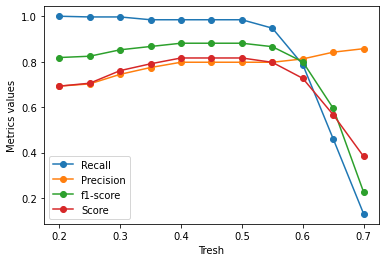

In [43]:
for col in plot_df.columns:
    plt.plot( plot_df.index , plot_df[col] , "o-", label = col )

plt.ylabel("Metrics values")
plt.xlabel("Tresh")
plt.legend()    
plt.show()

In [45]:
simple_scorer(lr_best,X_train, y_train, X_test, y_test )

,AUC,Recall,Precision,f1-score,Score,log_loss
TrainCV,0.759302,0.984568,0.79750,0.881215,0.816239,0.536872
Train,0.804334,0.984568,0.79750,0.881215,0.816239,0.514787
Test,0.758469,0.987805,0.80198,0.885246,0.822034,0.518427


In [44]:
# tresh = 0.5 seems best f1 but if we care most of tradeoff( precision and recall close ) then 0.6 is better
# but if only precision our aim in this scenario bigger tresh will lead to high precision
confusion_matrix( y_test, svc_pipe.predict(X_test)  )

array([[16, 20],
       [ 1, 81]], dtype=int64)